# Stroke Detection

<img src="images/stroke_image.jpg" alt="Stroke" style="max-width: 100%;" width="350" align="left">

**OVERVIEW**

This projects explores building a best machine learning model that could diagnose the stroke using given patient data. By understanding Patient lifecycle, age and symptoms, this model could help doctors diagnose the stroke with better accuracy. This project involves the analysis of historical data, application of various regression models, and in-depth feature engineering and to provide actionable insights to both technical and non-technical stakeholders.


**BUSINESS UNDERSTANDING**

Stroke need to diagnosed quickly to react and save patient's life. Machine learning can provide early automated diagnosis of stroke using patient's lifecycle, age and symptoms that enable Doctors to act quickly to save patient life. 

**DATA UNDERSTANDING**

In [1]:
# Core Libraries
import pandas as pd
import numpy as np
import os

# Plot libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, explained_variance_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from joblib import dump, load
import traceback

#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Let's load the data
%cd '../stroke_prediction'
df = pd.read_csv('data/stroke_prediction_dataset.csv')

/Users/ssubramaniam/berkeley_aiml/stroke_prediction


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [5]:
# Check for Missing Values
missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])
missing_values

,Features,Missing %
0,Patient ID,0.0
1,Patient Name,0.0
2,Age,0.0
3,Gender,0.0
4,Hypertension,0.0
5,Heart Disease,0.0
6,Marital Status,0.0
7,Work Type,0.0
8,Residence Type,0.0
9,Average Glucose Level,0.0


In [6]:
# Let's look at object Columns..
obj_list = df.select_dtypes("object").columns.to_list()
for i in obj_list:
    print(df[i].value_counts())
    print("\n")

Patient Name
Ela Sarna                4
Nayantara Mammen         4
Anika Sachdeva           4
Riya Ghosh               4
Kanav Balay              3
                        ..
Aaryahi Bhattacharyya    1
Suhana Krish             1
Samaira Mane             1
Jivin Ramaswamy          1
Gokul Trivedi            1
Name: count, Length: 13818, dtype: int64


Gender
Male      7622
Female    7378
Name: count, dtype: int64


Marital Status
Single      5156
Divorced    4980
Married     4864
Name: count, dtype: int64


Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64


Residence Type
Rural    7529
Urban    7471
Name: count, dtype: int64


Smoking Status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: count, dtype: int64


Alcohol Intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: count, dtype: int64


Physical Activity
High    

In [7]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [8]:
# Looking at Cholestrol Levels, We need to split those into seperate columns.
df_copy = df.copy()

df_copy[["hdl_str","ldl_str"]] = df_copy["Cholesterol Levels"].str.split(',', expand=True)
df_copy[["hdl_const", "hdl"]] = df_copy["hdl_str"].str.split(':', expand=True)

df_copy["hdl"] = df_copy["hdl"].astype(int)

df_copy[["ldl_const", "ldl"]] = df_copy["ldl_str"].str.split(':', expand=True)

df_copy["ldl"] = df_copy["ldl"].astype(int)
df_copy = df_copy.drop(columns=['hdl_str',"hdl_const", 'ldl_str',"ldl_const", "Cholesterol Levels"])

df_copy

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Symptoms,Diagnosis,hdl,ldl
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Moderate,0,Yes,Vegan,3.48,140/108,"Difficulty Speaking, Headache",Stroke,68,133
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Low,0,No,Paleo,1.73,146/91,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,63,70
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,High,0,Yes,Paleo,7.31,154/97,"Seizures, Dizziness",Stroke,59,95
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Moderate,0,No,Paleo,5.35,174/81,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,70,137
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Low,0,Yes,Pescatarian,6.84,121/95,Difficulty Speaking,Stroke,65,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,High,0,No,Paleo,1.12,171/92,NaN,No Stroke,44,153
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Low,1,No,Gluten-Free,1.47,155/71,Difficulty Speaking,No Stroke,35,183
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,High,1,No,Paleo,0.51,121/110,"Difficulty Speaking, Severe Fatigue, Headache",Stroke,57,159
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,High,0,Yes,Paleo,1.53,157/74,"Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke,79,91


In [9]:
# Next Process the symptoms into Multi Labels..
df_copy["Symptoms"] = df_copy["Symptoms"].fillna("None")
df_copy['Symptoms_list'] = df_copy['Symptoms'].str.split(',')

x = df_copy.explode("Symptoms_list")
x

df_out = (
    pd.concat(
        [df_copy.set_index("Patient ID"), pd.crosstab(x["Patient ID"], x["Symptoms_list"].str.strip())], axis=1
    )
    .reset_index()
    .drop(columns=["Symptoms_list", "Symptoms"])
)
df_out = df_out.set_index("Patient ID")

# We can remove the name column
df_out = df_out.drop(columns=["Patient Name"])
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 18153 to 11066
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietary

In [10]:
# Split out the Blood Pressure Levels
df_out[["Systolic_BP","Diastolic_BP"]] = df_out["Blood Pressure Levels"].str.split('/', expand=True)
df_out["Systolic_BP"] = df_out["Systolic_BP"].astype(int)
df_out["Diastolic_BP"] = df_out["Diastolic_BP"].astype(int)
df_out = df_out.drop(columns=["Blood Pressure Levels"])

In [11]:
# Convert Family History to Boolean
df_out["Family History of Stroke"] = df_out["Family History of Stroke"].astype(bool)

In [12]:
# Convert Diagnosis to Boolean
df_out['Diagnosis'] = df_out['Diagnosis'].map({'No Stroke': False, 'Stroke': True})

In [13]:
# Let's look at object Columns..
obj_list = df_out.select_dtypes("object").columns.to_list()
for i in obj_list:
    print(df_out[i].value_counts())
    print("\n")

Gender
Male      7622
Female    7378
Name: count, dtype: int64


Marital Status
Single      5156
Divorced    4980
Married     4864
Name: count, dtype: int64


Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64


Residence Type
Rural    7529
Urban    7471
Name: count, dtype: int64


Smoking Status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: count, dtype: int64


Alcohol Intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: count, dtype: int64


Physical Activity
High        5060
Moderate    4998
Low         4942
Name: count, dtype: int64


Dietary Habits
Paleo             2192
Vegan             2185
Vegetarian        2170
Non-Vegetarian    2144
Keto              2135
Pescatarian       2106
Gluten-Free       2068
Name: count, dtype: int64




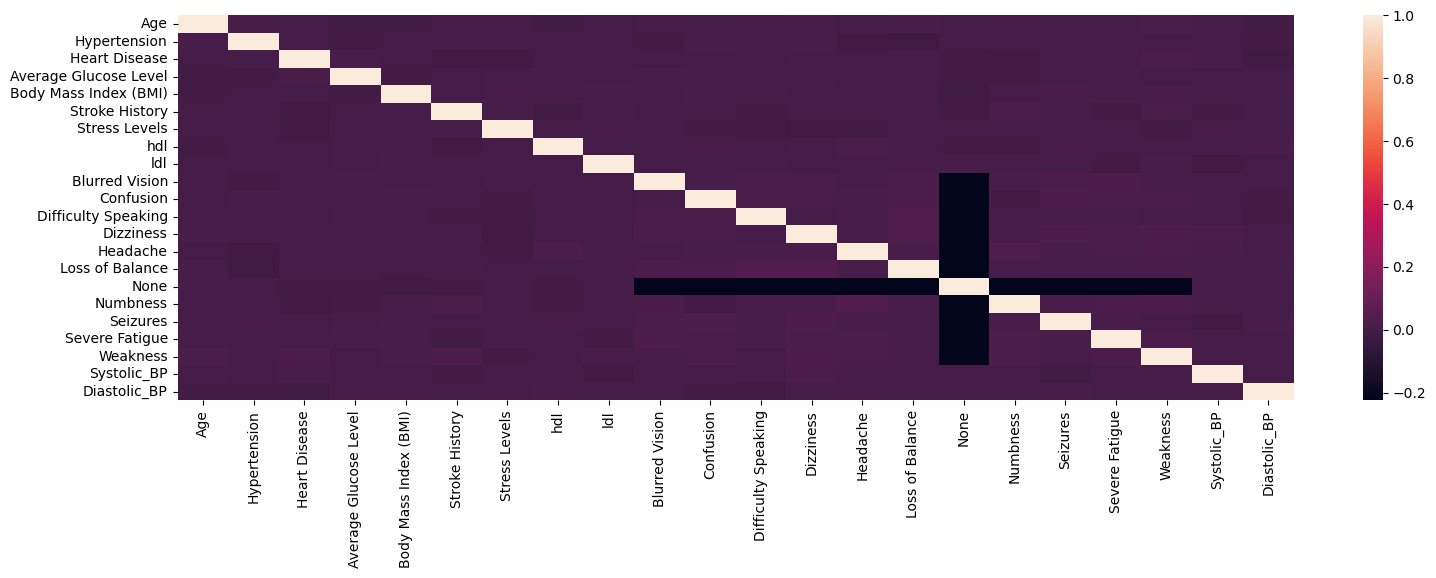

In [14]:
# Let's check the correlation matrix
corr = df_out.select_dtypes(["int64", "float64"]).corr()
corr
sns.heatmap(corr);

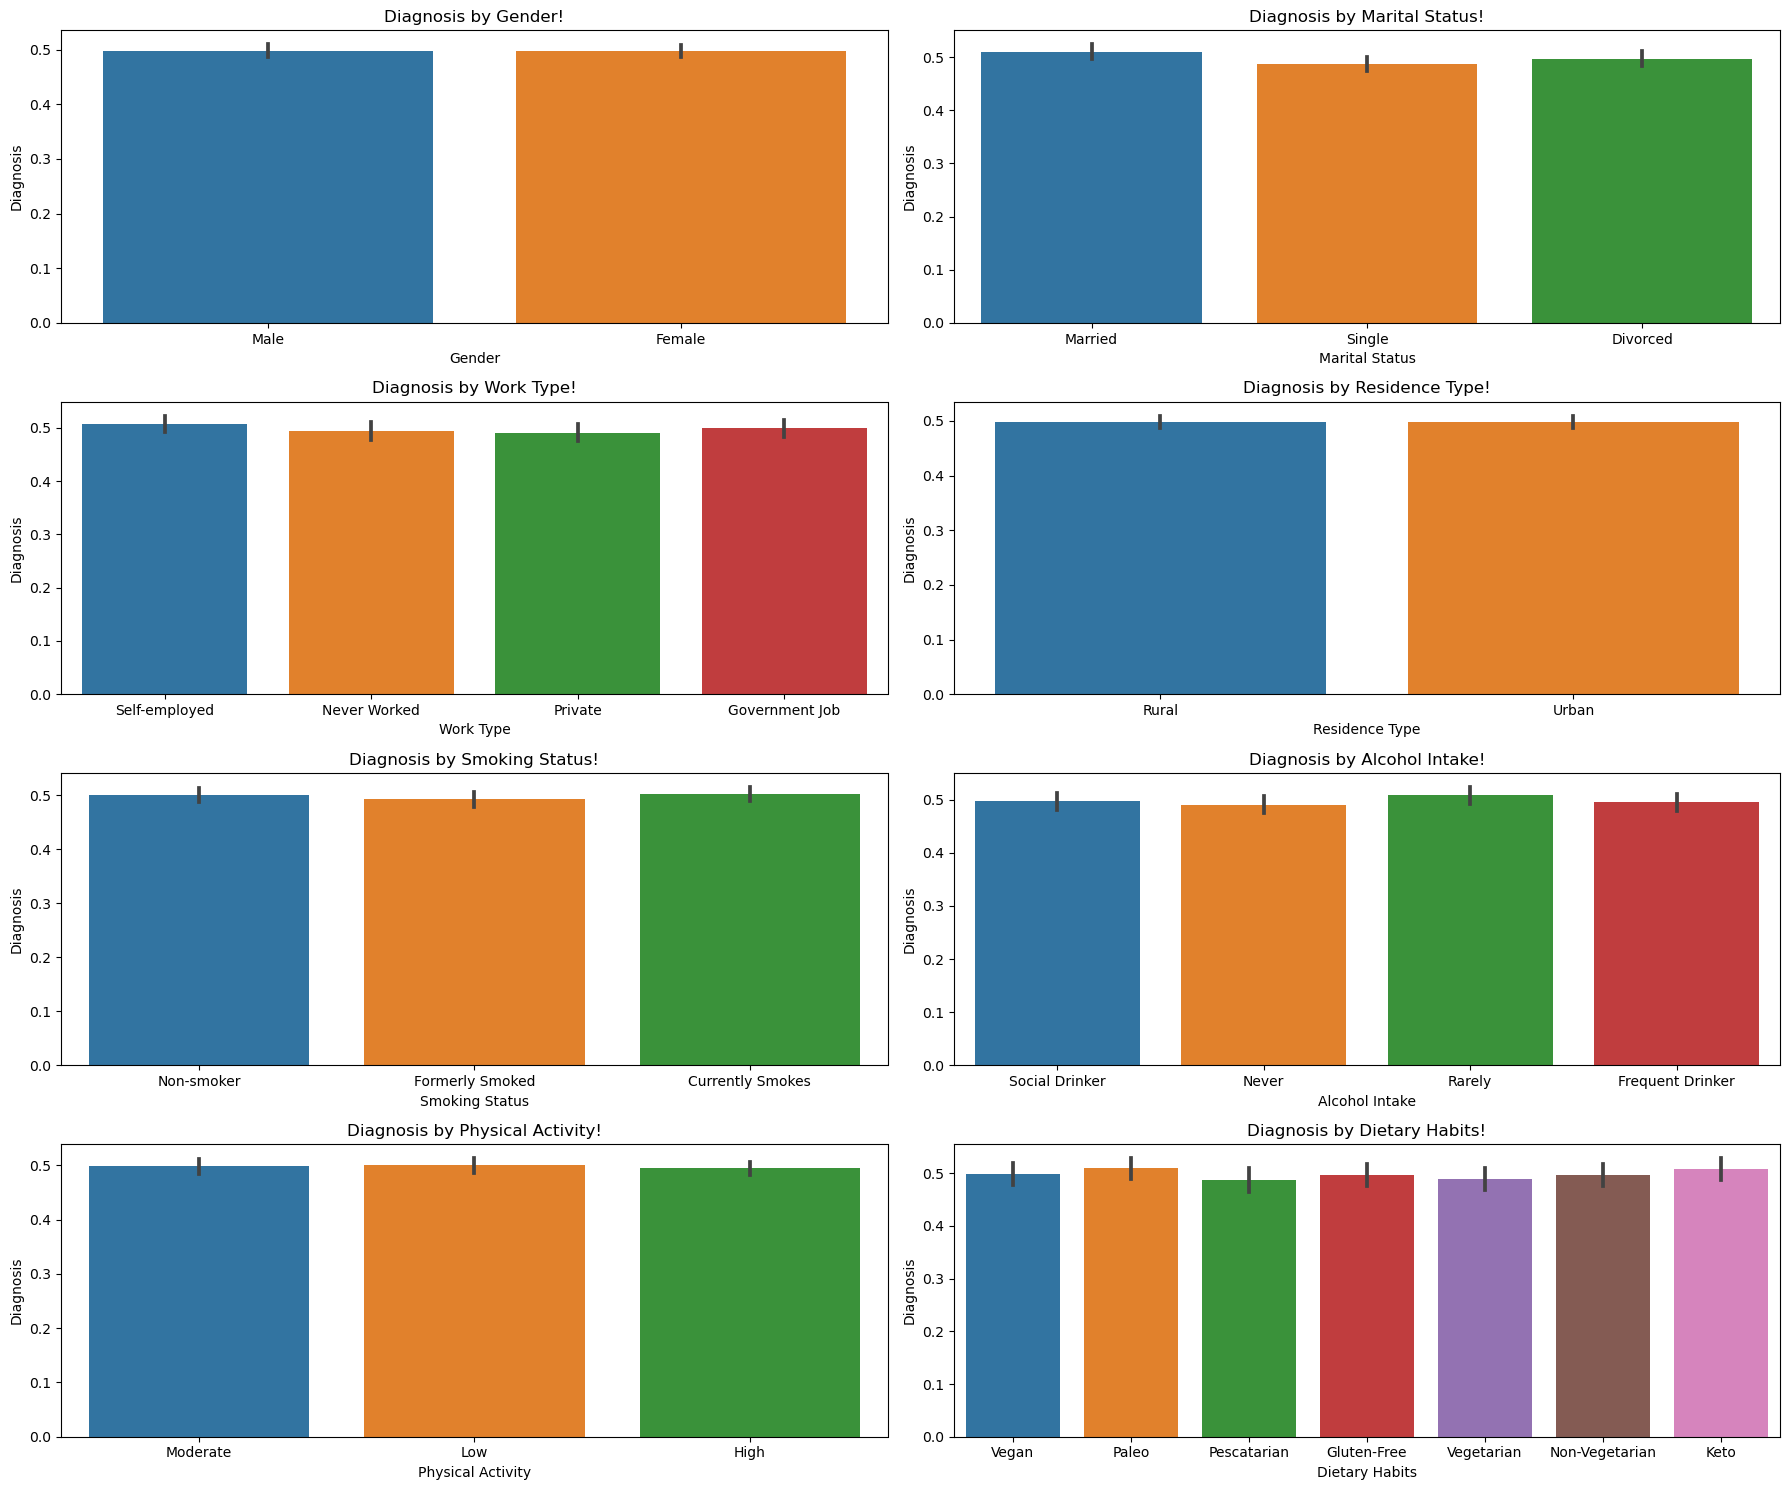

In [15]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15));
row=0
col=0
obj_list = df_out.select_dtypes("object").columns.to_list()
for index, column in enumerate(obj_list):
    axis = axs[row, col]
    sns.barplot(x=column, y='Diagnosis', data=df_out, ax=axis);
    axis.set_title(f'Diagnosis by {obj_list[index]}!')
    col = col+1
    if(col>1): 
        row=row+1
        col=0
fig.tight_layout()
plt.show()

**Modelling**

In [16]:
X = df_out.drop('Diagnosis', axis=1)
y = df_out['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
obj_list = df_out.select_dtypes("object").columns.to_list()
ord_cols = ["Physical Activity"]
obj_list.remove("Physical Activity")
num_list = df_out.select_dtypes(["int64","float64"]).columns.to_list()

In [18]:
col_transformer = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(), obj_list),
    ('num', StandardScaler(), num_list),
    ("ord", OrdinalEncoder(), ord_cols)])

pipe = Pipeline([
    ("transformer", col_transformer)
])

In [22]:
# Grid Hyper Parameters

# Decision Tree Hyperparameters
dt_param_grid = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random'],
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10, 20],
    'dt__min_samples_leaf': [1, 2, 5, 10],
    'dt__max_features': [None, 'sqrt', 'log2'],
}

# RandomForest Hyperparameters 
random_forest_param_grid = {
    'rfc__n_estimators': np.arange(10, 200, 10),
    'rfc__max_features': ['sqrt'],
    'rfc__max_depth': np.arange(1, 20),
    'rfc__bootstrap': [True, False],
    'rfc__criterion': ['gini', 'entropy'],
    # 'rfc__min_samples_split': [2, 5, 10],
    # 'rfc__min_samples_leaf': [1, 2, 4],
}

# Support Vector Mechine Hyperparameters
svc_param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    # 'svc__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    # 'svc__degree': [2, 3, 4, 5],  # Only used when kernel is 'poly'
    # 'svc__coef0': [0, 1, 2, 3],  # Useful for 'poly' and 'sigmoid'
    # 'svc__shrinking': [True, False],
}

# LogistcRegression Hyperparameters
lgr_param_grid = {
    'lgr__C': [100, 10, 1.0, 0.1, 0.01],
    'lgr__solver': ['newton-cg', 'lbfgs', 'saga', 'sag'],
    'lgr__penalty': ['l2']
}

# XGB Classifier Param Grid
xgb_param_grid = {
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [4, 5, 6],
    # 'xgb__min_child_weight': [1, 2, 3],
    # 'xgb__gamma': [0, 0.1, 0.2],
    # 'xgb__subsample': [0.8, 0.9, 1.0],
    # 'xgb__colsample_bytree': [0.8, 0.9, 1.0],
    'xgb__objective': ['binary:logistic']
}

# XGBRF Classifier
xgbrf_param_grid = {
    'xgbrf__n_estimators': [100, 200, 300],  # Number of boosted trees to fit
    'xgbrf__max_depth': [3, 5, 7, 10],       # Maximum tree depth for base learners
    'xgbrf__learning_rate': [0.01, 0.05, 0.1], # Boosting learning rate (xgb's "eta")
}

# Adaboost Classifier
adaboost_params = {
    'ada__n_estimators': [10, 50, 100, 200],
    'ada__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    'ada__algorithm': ['SAMME', 'SAMME.R']
}

# Gradient Boost Classifier
gradientboost_params = {
    'grb__n_estimators': [10, 50, 100, 200],
    'grb__learning_rate': [0.001, 0.01, 0.1, 0.5, 1],
    # 'grb__subsample': [0.5, 0.8, 1.0],
    'grb__max_depth': [3, 4, 5, 6, 7],
    # 'grb__min_samples_split': [2, 3, 4],
    # 'grb__min_samples_leaf': [1, 2, 3]
}

# GaussianB Classifier
gaussiannb_params = {
    'gnb__var_smoothing': [1e-12, 1e-10, 1e-8, 1e-6, 1e-4]
}

In [23]:
def grid_search(scoring, param_grid, step, model):
    pipe = Pipeline([
        ("transformer", col_transformer),
        ("scale", StandardScaler()),
        (step, model)
    ])   
    return GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring)

model_names = {
    "lgr_model": "LogisticRegression",
    "dt_model": "DecisionTree",
    "rfc_model": "RandomForest",
    "xgb_model": "XGBoost",
    "gnb_model": "GaussianNB",
    "xgbrf_model": "XGBoostRF", 
    "ada_model": "AdaBoost",
    "grb_model": "GradientBoost"
}

models = [
    {"lgr_model": grid_search("recall", lgr_param_grid, "lgr", LogisticRegression(max_iter=200000))},
    
    {"dt_model": grid_search("recall", dt_param_grid, "dt", DecisionTreeClassifier())},
    
    {"rfc_model": grid_search("recall", random_forest_param_grid, "rfc", RandomForestClassifier())},
    
    {"xgb_model": grid_search("recall", xgb_param_grid, "xgb", xgb.XGBClassifier(eval_metric="error"))},
    
    {"xgbrf_model": grid_search("recall", xgbrf_param_grid, "xgbrf", xgb.XGBRFClassifier())},
    
    {"ada_model": grid_search("recall", adaboost_params, "ada", AdaBoostClassifier())},
    
    {"grb_model": grid_search("recall", gradientboost_params, "grb", GradientBoostingClassifier())},
    
    {"gnb_model": grid_search("recall", gaussiannb_params, "gnb", GaussianNB())},

]

In [24]:
def precision_thresh(predict_probs, y, thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    return precision_score(y, preds, pos_label=1)

def recall_thresh(predict_probs, y, thresh):
    preds = np.where(predict_probs >= thresh, 1, 0)
    return recall_score(y, preds, pos_label=1)


def plot_recall_precision(Xtest, ytest, model, title):
    prob_table = model.predict_proba(Xtest)[:, 1]
    thresholds = np.arange(0, 1, .05)
    results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(prob_table, ytest, i) for i in thresholds]})
    results_df['recall'] = [recall_thresh(prob_table, ytest, i) for i in thresholds]
    
    plt.figure(figsize=(12, 3))
    plt.plot(results_df['threshold'], results_df['precision'], '--o', label='Precision')
    
    plt.plot(results_df['threshold'], results_df['recall'], '--o', label='Recall', lw=2)
    plt.legend()
    plt.xticks(thresholds)
    plt.xlabel('Threshold')
    plt.ylabel('Precision and Recall')
    plt.title(title)
    plt.grid();

In [25]:
for i in models:
    try:
        for model_name, model in i.items():
            model = model.fit(X_train, y_train)
            filename = f'models/{model_name}.sav'
            dump(model, filename)
    except Exception:
        traceback.print_exc()
        pass

/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


**EVALUATION**

In [26]:
# Load Models from the stored files..
import os
files = os.listdir("models/")

models_dict = {}
for file in files:
    key = file.strip().split(".")[0]
    if key:
        model = load(f"models/{file}")
        models_dict[key] = model

In [27]:
# Calculate accuracy scores of the models

score_list = {}

for i in models_dict:
    test_score = accuracy_score(y_test, models_dict[i].predict(X_test))
    train_score = accuracy_score(y_train, models_dict[i].predict(X_train))
    score_list[i] = [train_score, test_score]
    
models_scores = pd.DataFrame(score_list).T
models_scores.rename(columns={0:"Test Score", 1: "Train Score"}, inplace=True)

models_scores.index = models_scores.index.map(model_names)

models_scores

,Test Score,Train Score
XGBoostRF,0.822417,0.494333
AdaBoost,0.513500,0.514333
XGBoost,0.920500,0.504333
LogisticRegression,0.520500,0.513000
DecisionTree,0.590750,0.496000
GradientBoost,0.998833,0.481000
RandomForest,0.888833,0.507333
GaussianNB,0.520250,0.501000


In [28]:
# Compute Confusion Matrix

cm_dict = {'Model':[],
        'True Negative': [],
        'False Positive':[],
        'False Negative':[],
        'True Positive': []
       }

df_cm = pd.DataFrame(cm_dict)

for key, model in models_dict.items():
    preds = models_dict[key].predict(X_test)
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    df_cm = pd.concat([df_cm, pd.DataFrame({'Model': [model_names[key]],
        'True Negative': [tn],
        'False Positive':[fp],
        'False Negative': [fn],
        'True Positive': [tp]
       })], ignore_index=True)
df_cm

,Model,True Negative,False Positive,False Negative,True Positive
0,XGBoostRF,1304.0,177.0,1340.0,179.0
1,AdaBoost,876.0,605.0,852.0,667.0
2,XGBoost,743.0,738.0,749.0,770.0
3,LogisticRegression,858.0,623.0,838.0,681.0
4,DecisionTree,696.0,785.0,727.0,792.0
5,GradientBoost,719.0,762.0,795.0,724.0
6,RandomForest,766.0,715.0,763.0,756.0
7,GaussianNB,804.0,677.0,820.0,699.0


/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages

/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ssubramaniam/opt/anaconda3/lib/python3.9/site-packages

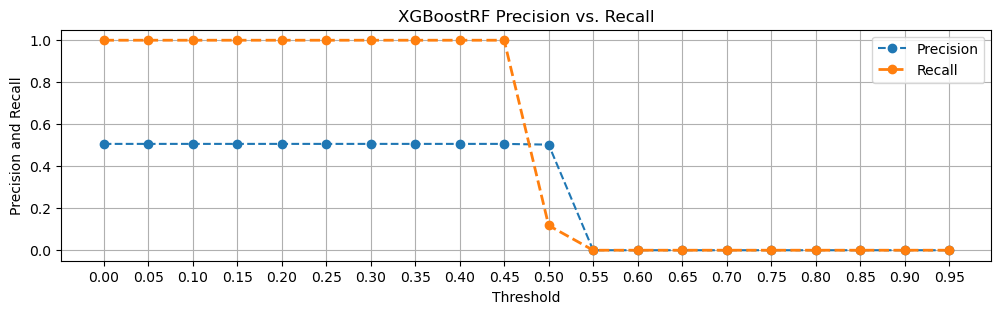

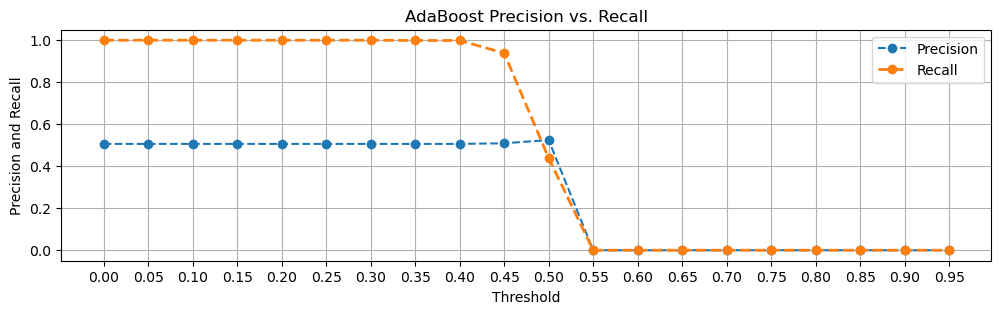

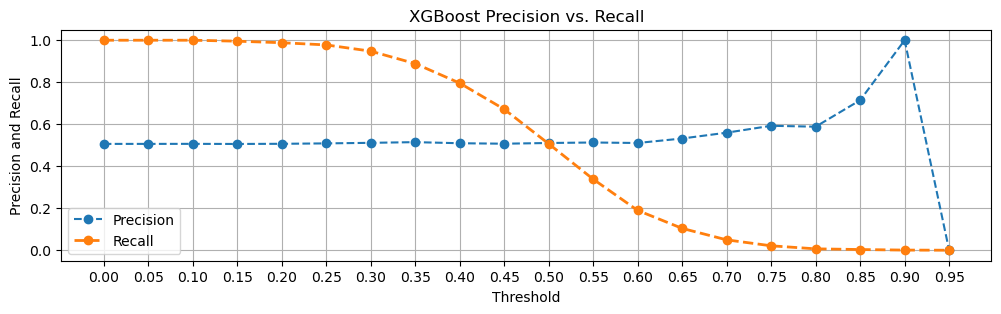

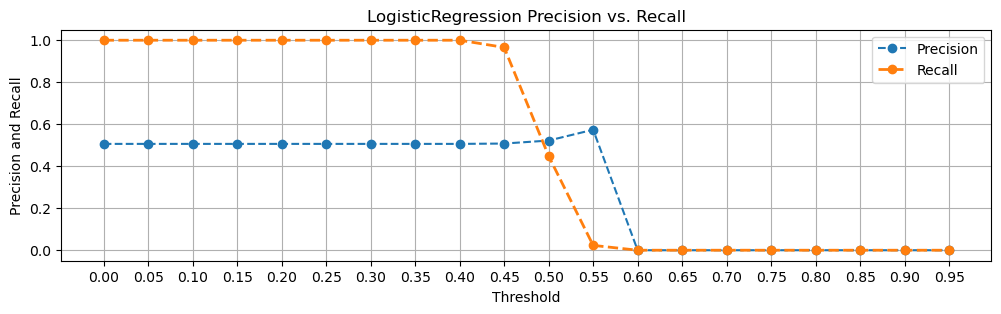

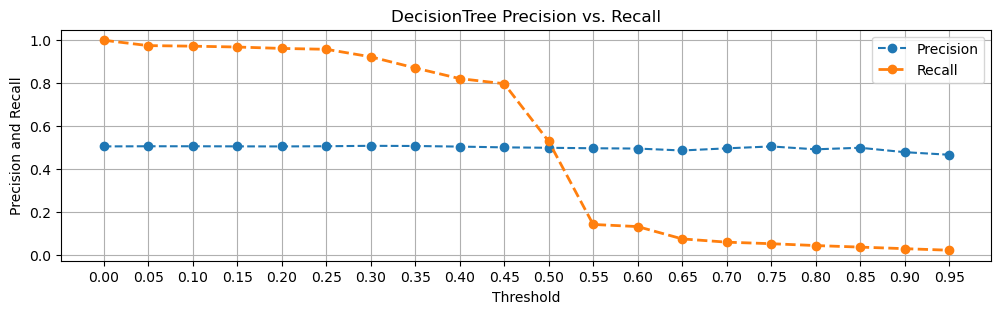

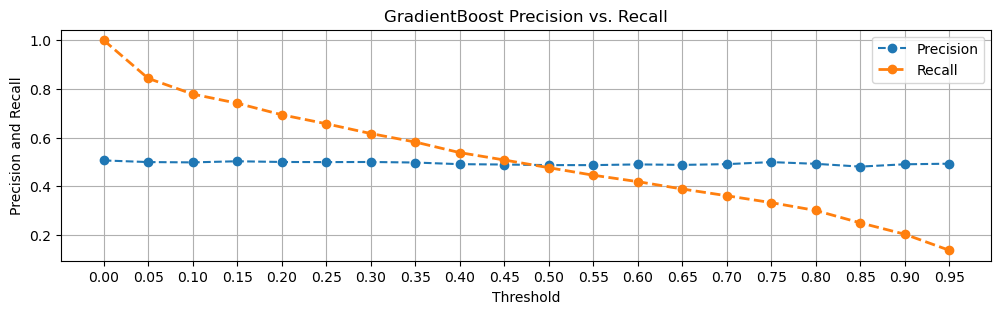

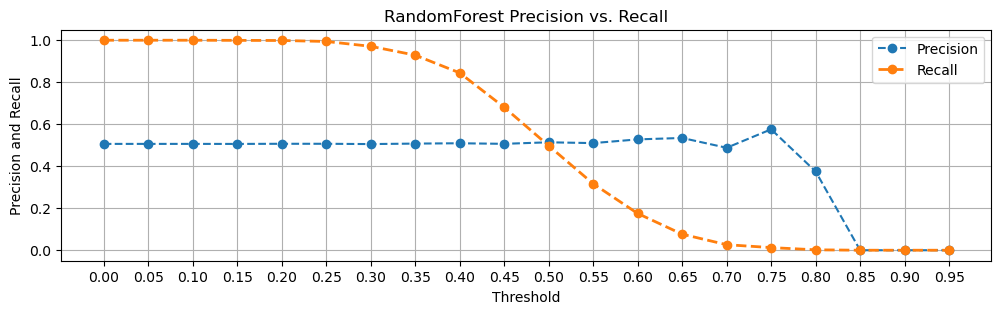

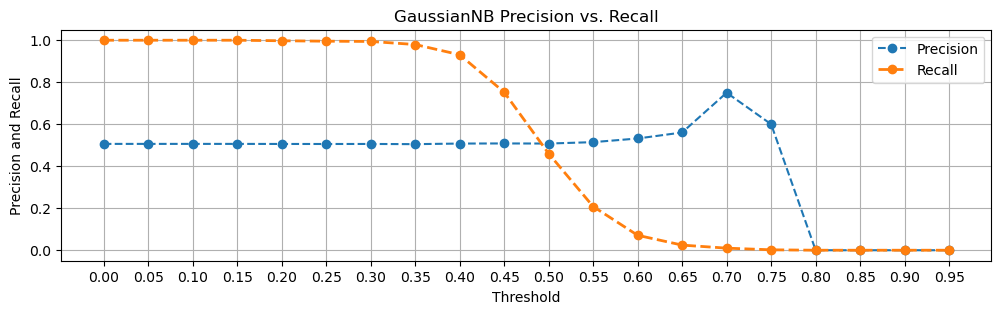

In [29]:
for key, model in models_dict.items():
    plot_recall_precision(X_test, y_test, models_dict[key], f"{model_names[key]} Precision vs. Recall")

**Analyze Model Performance**

In [30]:
df_cm.sort_values(by=['False Negative'])

,Model,True Negative,False Positive,False Negative,True Positive
4,DecisionTree,696.0,785.0,727.0,792.0
2,XGBoost,743.0,738.0,749.0,770.0
6,RandomForest,766.0,715.0,763.0,756.0
5,GradientBoost,719.0,762.0,795.0,724.0
7,GaussianNB,804.0,677.0,820.0,699.0
3,LogisticRegression,858.0,623.0,838.0,681.0
1,AdaBoost,876.0,605.0,852.0,667.0
0,XGBoostRF,1304.0,177.0,1340.0,179.0



1. **XGBoostRF** has a high True Negative and high False Negative.
2. **AdaBoost** and **LogisticRegression** has low True Positive with comparitively higher True Negative. And has lowest False positives as well.
3. **GaussianNB** has comparitively higher False Negative. Given this is medical in nature, lower the false negative is better.
4. Rest of the models offer a balanced performance with DecisionTree on the lowest end of False Negative.

**Sensitivity (Recall):**

1. If identifying True Positives is critical, then DecisionTree and XGBoost do the best job, as they have the highest numbers of True Positives (794 and 770).

**Specificity:**

1. If avoiding False Positives is important, then XGBoostRF and AdaBoost are the best bet.

**Balanced Performance:**

1. DecisionTree, GradientBoost, RandomForest offer balanced models of all.

**Error Rates:**

1. DecisionTree has the highest number of False Positives (784), making it more prone to Type I errors.
2. XGBoostRF has the highest number of False Negatives (1094), making it more prone to Type II errors.


Note: This is a simplistic analysis. It's often good to look at other metrics like F1 Score, ROC AUC, and precision-recall curves for a more complete picture.

**Reducing False Negative**

In a medical context like stroke detection, reducing False Negatives (FN) is crucial because a FN means that a patient who actually has stroke is wrongly classified as not having it, which could lead to a lack of treatment and severe health risks. Here's how the models fare in terms of minimizing FN:

False Negatives (Lower is Better):

DecisionTree:725.0
XGBoost:749.0
RandomForest:758.0
GradientBoost: 780.0
GuassianNB: 820.0
LogisticRegression: 838.0
AdaBoost: 852.0
XGBoostRF: 1333.0

**DecisionTree** has the lowest number of False Negatives (725), followed closely by XGBoost and RandomForest. This makes these models the most suitable for minimizing the risk of missing actual positive cases of stroke.

**Recommendations**

Fine-Tuning: For the models with the lowest FN, like RandomForest, you could consider fine-tuning hyperparameters to see if you can reduce FN even more without significantly affecting other metrics.

Cost-Sensitive Learning: Implement cost-sensitive learning where the misclassification cost for FN is higher than for FP.

Ensemble Methods: Combining predictions from models that have low FN could potentially result in an even lower overall FN.

Class Weighting or Resampling: Given the importance of correctly identifying positive cases, using techniques like class weighting or oversampling the positive class could also be helpful.

Additional Features or Data: Sometimes additional information can help the model better separate the classes.

Remember that in medical contexts, it's not only about the model's statistical performance but also about how clinicians will use this information. Therefore, domain expertise is crucial in interpreting these results.

# Selecting the Best Model

Based on analysis above, DecisionTree provides the best balanced model among the all.

In [32]:
# Credit: https://johaupt.github.io/blog/columnTransformer_feature_names.html
def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names

In [33]:
import sklearn
import warnings
best_model = models_dict["dt_model"]
best_estimator = best_model.best_estimator_
dt = best_model.best_estimator_.named_steps["dt"]
feature_importances = dt.feature_importances_
transformer = best_estimator.named_steps['transformer']
feature_names = get_feature_names(transformer)
feature_names


df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)

df_feature_importance.head()


/var/folders/dp/rbxn103d22s51s7mg1hyjn5m0000gp/T/ipykernel_47181/91014455.py:31: UserWarning: Transformer num (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
/var/folders/dp/rbxn103d22s51s7mg1hyjn5m0000gp/T/ipykernel_47181/91014455.py:31: UserWarning: Transformer ord (type OrdinalEncoder) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


,Feature,Importance
28,num__Average Glucose Level,0.139859
31,num__Stress Levels,0.115024
29,num__Body Mass Index (BMI),0.108081
45,num__Systolic_BP,0.093936
25,num__Age,0.086495


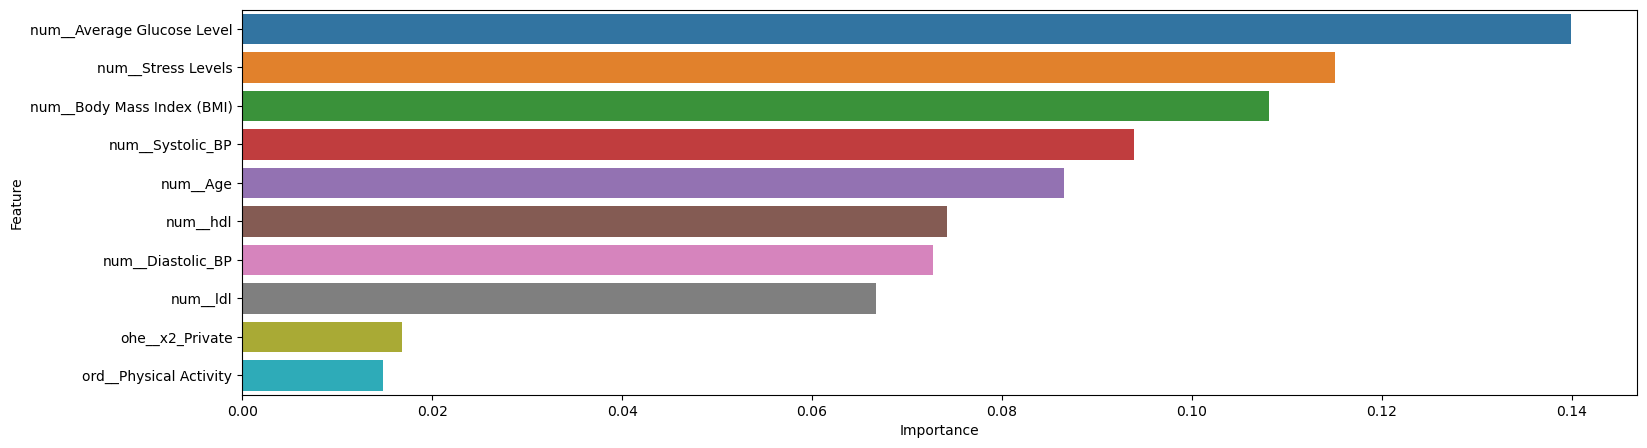

In [36]:
# Show Top 10 Important Features
sns.barplot(data=important_features.head(10), y="Feature", x="Importance");

# Test the Model

In [42]:
df_sample = df_out.copy().head(1).drop(columns=["Diagnosis"])
df_sample

test_preds = best_model.predict_proba(df_sample)
test_preds

array([[0.47855874, 0.52144126]])

In [43]:
# Probability that the patient data entry has stroke
risk_percentage = test_preds[0][1] * 100

# Interpretation
if risk_percentage == 0:
    print("You don't have stroke.\n\n")
    
elif risk_percentage == 100:
    print("You have stroke.\n\n")
    
elif 100 > risk_percentage > 50:
    print(f"You have a high risk of {risk_percentage:.2f}% of stroke.\n\n")
    
elif 50 > risk_percentage > 0:
    print(f"You have a low risk of {risk_percentage:.2f}% of having stroke.\n\n")

You have a high risk of 52.14% of stroke.




In [46]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_32 <= 1.24
|   |--- feature_29 <= 1.73
|   |   |--- feature_33 <= 0.01
|   |   |   |--- feature_33 <= -0.39
|   |   |   |   |--- feature_31 <= -1.14
|   |   |   |   |   |--- feature_45 <= -0.86
|   |   |   |   |   |   |--- feature_28 <= 0.35
|   |   |   |   |   |   |   |--- feature_21 <= 1.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 0.35
|   |   |   |   |   |   |   |   |   |--- feature_33 <= -1.26
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |   |   |--- feature_33 >  -1.26
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |--- feature_2 >  0.35
|   |   |   |   |   |   |   |   |   |--- feature_32 <= 0.47
|   |   |   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |   |   |   |--- feature_32 >  0.47
|   |   |   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- feature_21 >  1.00
|   |   |   |   |   |   |   |   |--- feature_9 <= -0.00
|  

In [363]:
df_out.columns

Index(['Age', 'Gender', 'Hypertension', 'Heart Disease', 'Marital Status',
       'Work Type', 'Residence Type', 'Average Glucose Level',
       'Body Mass Index (BMI)', 'Smoking Status', 'Alcohol Intake',
       'Physical Activity', 'Stroke History', 'Family History of Stroke',
       'Dietary Habits', 'Stress Levels', 'Diagnosis', 'hdl', 'ldl',
       'Blurred Vision', 'Confusion', 'Difficulty Speaking', 'Dizziness',
       'Headache', 'Loss of Balance', 'None', 'Numbness', 'Seizures',
       'Severe Fatigue', 'Weakness', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')

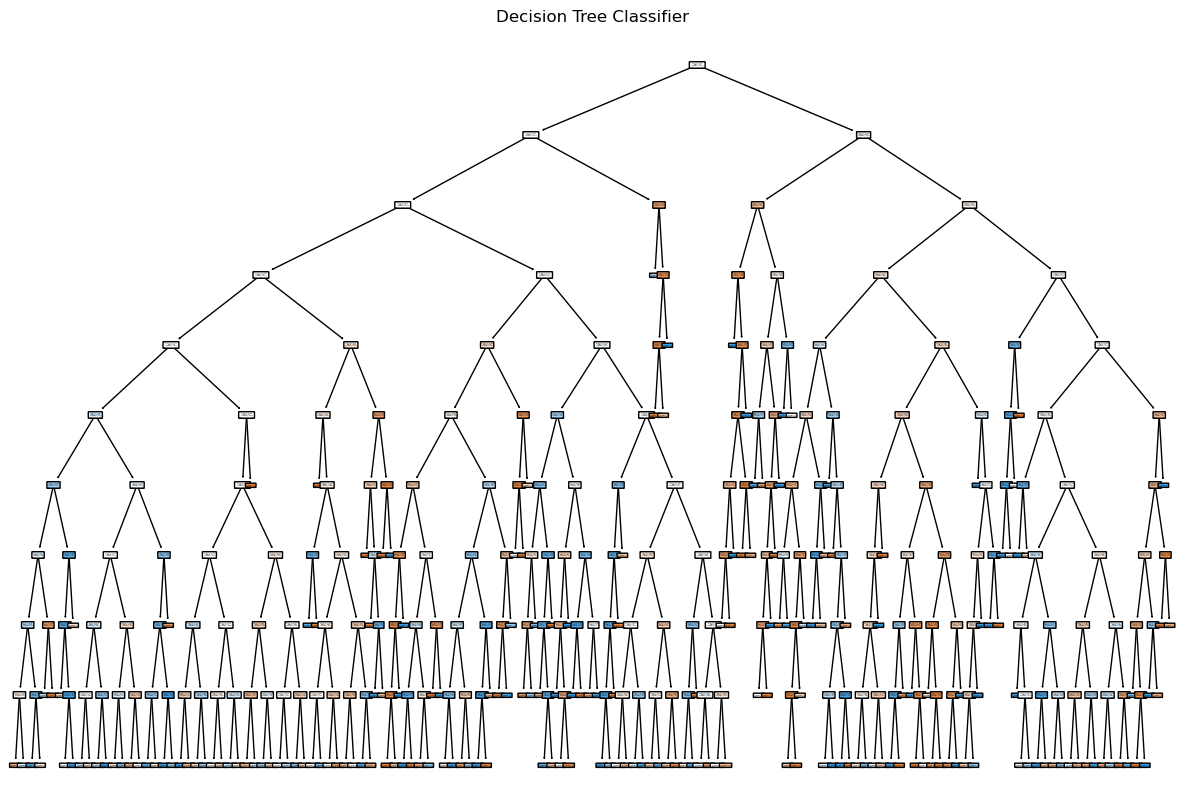

In [47]:
plt.figure(figsize=(15, 10))
plot_tree(dt, filled=True, rounded=True)
plt.title('Decision Tree Classifier')
plt.show()